In [20]:
%run ../../main.py
%matplotlib inline

In [21]:
from cba import CBA
from cba import generateCARs, M1Algorithm, M2Algorithm
from cba.algorithms import createCARs



import matplotlib.pyplot as plt
import matplotlib.patches as patches

from itertools import combinations

import itertools
import pandas as pd
import numpy
import re

movies = pd.read_csv("../data/movies.csv", sep=";")
movies_discr = movies.copy(True)



budget_bins = range(0, 350, 50)
budget_bins_names = [ "<{0};{1})".format(i, i + 50) for i in budget_bins[:-1] ]

celebrities_bins = range(0, 10, 2)
celebrities_bins_names = [ "<{0};{1})".format(i, i + 2) for i in celebrities_bins[:-1] ]

movies_discr['estimated-budget'] = pd.cut(movies['estimated-budget'], budget_bins, labels=budget_bins_names)
movies_discr['a-list-celebrities'] = pd.cut(movies['a-list-celebrities'], celebrities_bins, labels=celebrities_bins_names)

movies_discr.to_csv("../data/movies_discr.csv", sep=";")

transactionDB = TransactionDB.from_pandasdf(movies_discr)

rules = generateCARs(transactionDB, support=5, confidence=50)

movies_vals = movies.get_values()


x = range(0, 350, 50)
y = range(1, 9)


x_points = list(map(lambda n: n[0], movies_vals))
y_points = list(map(lambda n: n[1], movies_vals))
data_class = list(movies['class'])
appearance = {
    'box-office-bomb': ('brown', "o"),
    'main-stream-hit': ('blue', "o"),
    'critical-success': ('green', "o")
}
rule_appearance = {
    'box-office-bomb': 'tan',
    'main-stream-hit': 'aqua',
    'critical-success': 'lightgreen'
}


plt.style.use('seaborn-white')
rules

[CAR ('a-list-celebrities', '<0;2)') -> Consequent{('class', 'box-office-bomb')} | support: 0.31, confidence: 1.00, len: 1,
 CAR ('estimated-budget', '<0;50)'), ('a-list-celebrities', '<0;2)') -> Consequent{('class', 'box-office-bomb')} | support: 0.11, confidence: 1.00, len: 2,
 CAR ('estimated-budget', '<50;100)'), ('a-list-celebrities', '<0;2)') -> Consequent{('class', 'box-office-bomb')} | support: 0.09, confidence: 1.00, len: 2,
 CAR ('estimated-budget', '<250;300)') -> Consequent{('class', 'main-stream-hit')} | support: 0.06, confidence: 1.00, len: 1,
 CAR ('estimated-budget', '<0;50)'), ('a-list-celebrities', '<4;6)') -> Consequent{('class', 'critical-success')} | support: 0.06, confidence: 1.00, len: 2,
 CAR ('a-list-celebrities', '<0;2)'), ('estimated-budget', '<150;200)') -> Consequent{('class', 'box-office-bomb')} | support: 0.06, confidence: 1.00, len: 2,
 CAR ('estimated-budget', '<200;250)') -> Consequent{('class', 'box-office-bomb')} | support: 0.06, confidence: 0.67, le

In [22]:
from cba.data_structures import Antecedent, Item

i = Item("A", 1)
i2 = Item("B", 2)
a = Antecedent([i, i2])

type(rules[0].antecedent)

cba.data_structures.antecedent.Antecedent

In [23]:
m2c = M2Algorithm(rules, transactionDB).build()

m2c.rules

[CAR ('a-list-celebrities', '<0;2)') -> Consequent{('class', 'box-office-bomb')} | support: 0.31, confidence: 1.00, len: 1,
 CAR ('estimated-budget', '<250;300)') -> Consequent{('class', 'main-stream-hit')} | support: 0.06, confidence: 1.00, len: 1,
 CAR ('estimated-budget', '<0;50)'), ('a-list-celebrities', '<4;6)') -> Consequent{('class', 'critical-success')} | support: 0.06, confidence: 1.00, len: 2,
 CAR ('estimated-budget', '<200;250)') -> Consequent{('class', 'box-office-bomb')} | support: 0.06, confidence: 0.67, len: 1,
 CAR ('estimated-budget', '<50;100)'), ('a-list-celebrities', '<4;6)') -> Consequent{('class', 'critical-success')} | support: 0.06, confidence: 0.67, len: 2,
 CAR ('estimated-budget', '<0;50)') -> Consequent{('class', 'box-office-bomb')} | support: 0.14, confidence: 0.62, len: 1,
 CAR ('estimated-budget', '<50;100)'), ('a-list-celebrities', '<2;4)') -> Consequent{('class', 'box-office-bomb')} | support: 0.06, confidence: 0.50, len: 2,
 CAR ('a-list-celebrities',

In [24]:
def plot_rule(rule, plt):
    interval_regex = "<(\d+);(\d+)\)"
    
    lower_y = 0
    area_y = celebrities_bins[-1]
    
    lower_x = 0
    area_x = budget_bins[-1]
    
    
    
    
    if len(rule.antecedent) != 0:
        if rule.antecedent[0][0] == "a-list-celebrities":
            y = rule.antecedent[0]
            y_boundaries = re.search(interval_regex, y[1])
            lower_y = float(y_boundaries.group(1))
            upper_y = float(y_boundaries.group(2))
            area_y = upper_y - lower_y

            axis = plt.gca()
        else:
            x = rule.antecedent[0]
            x_boundaries = re.search(interval_regex, x[1])
            lower_x = float(x_boundaries.group(1))
            upper_x = float(x_boundaries.group(2))
            area_x = upper_x - lower_x
        
    if len(rule.antecedent) > 1:
        if rule.antecedent[1][0] == "a-list-celebrities":
            y = rule.antecedent[1]
            y_boundaries = re.search(interval_regex, y[1])
            lower_y = float(y_boundaries.group(1))
            upper_y = float(y_boundaries.group(2))
            area_y = upper_y - lower_y

            axis = plt.gca()
        else:
            x = rule.antecedent[1]
            x_boundaries = re.search(interval_regex, x[1])
            lower_x = float(x_boundaries.group(1))
            upper_x = float(x_boundaries.group(2))
            area_x = upper_x - lower_x
            
    
    axis = plt.gca()

    class_name = rule.consequent[1]
    
    axis.add_patch(
       patches.Rectangle((lower_x, lower_y), area_x, area_y, zorder=-2, facecolor=rule_appearance[class_name], alpha=rule.confidence)
    )


rule count 21


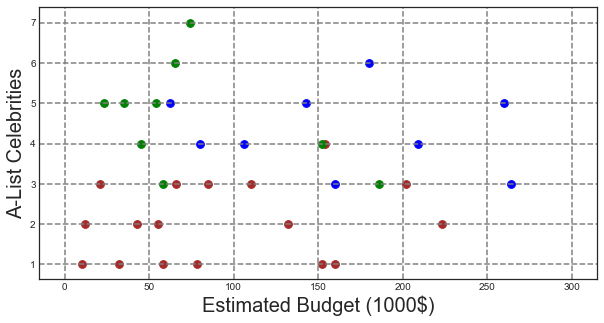

In [25]:
plt.figure(figsize=(10, 5))

# data cases
for i in range(len(x_points)):
    plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)


# rule boundary lines
for i, n in enumerate(x):
    plt.axhline(y=y[i], color = "grey", linestyle="dashed")
    plt.axvline(x=x[i], color = "grey", linestyle="dashed")

    
    
plt.xlabel('Estimated Budget (1000$)', fontsize=20)
plt.ylabel('A-List Celebrities', fontsize=20)



plt.savefig("../data/datacases.png")

print("rule count", len(rules))

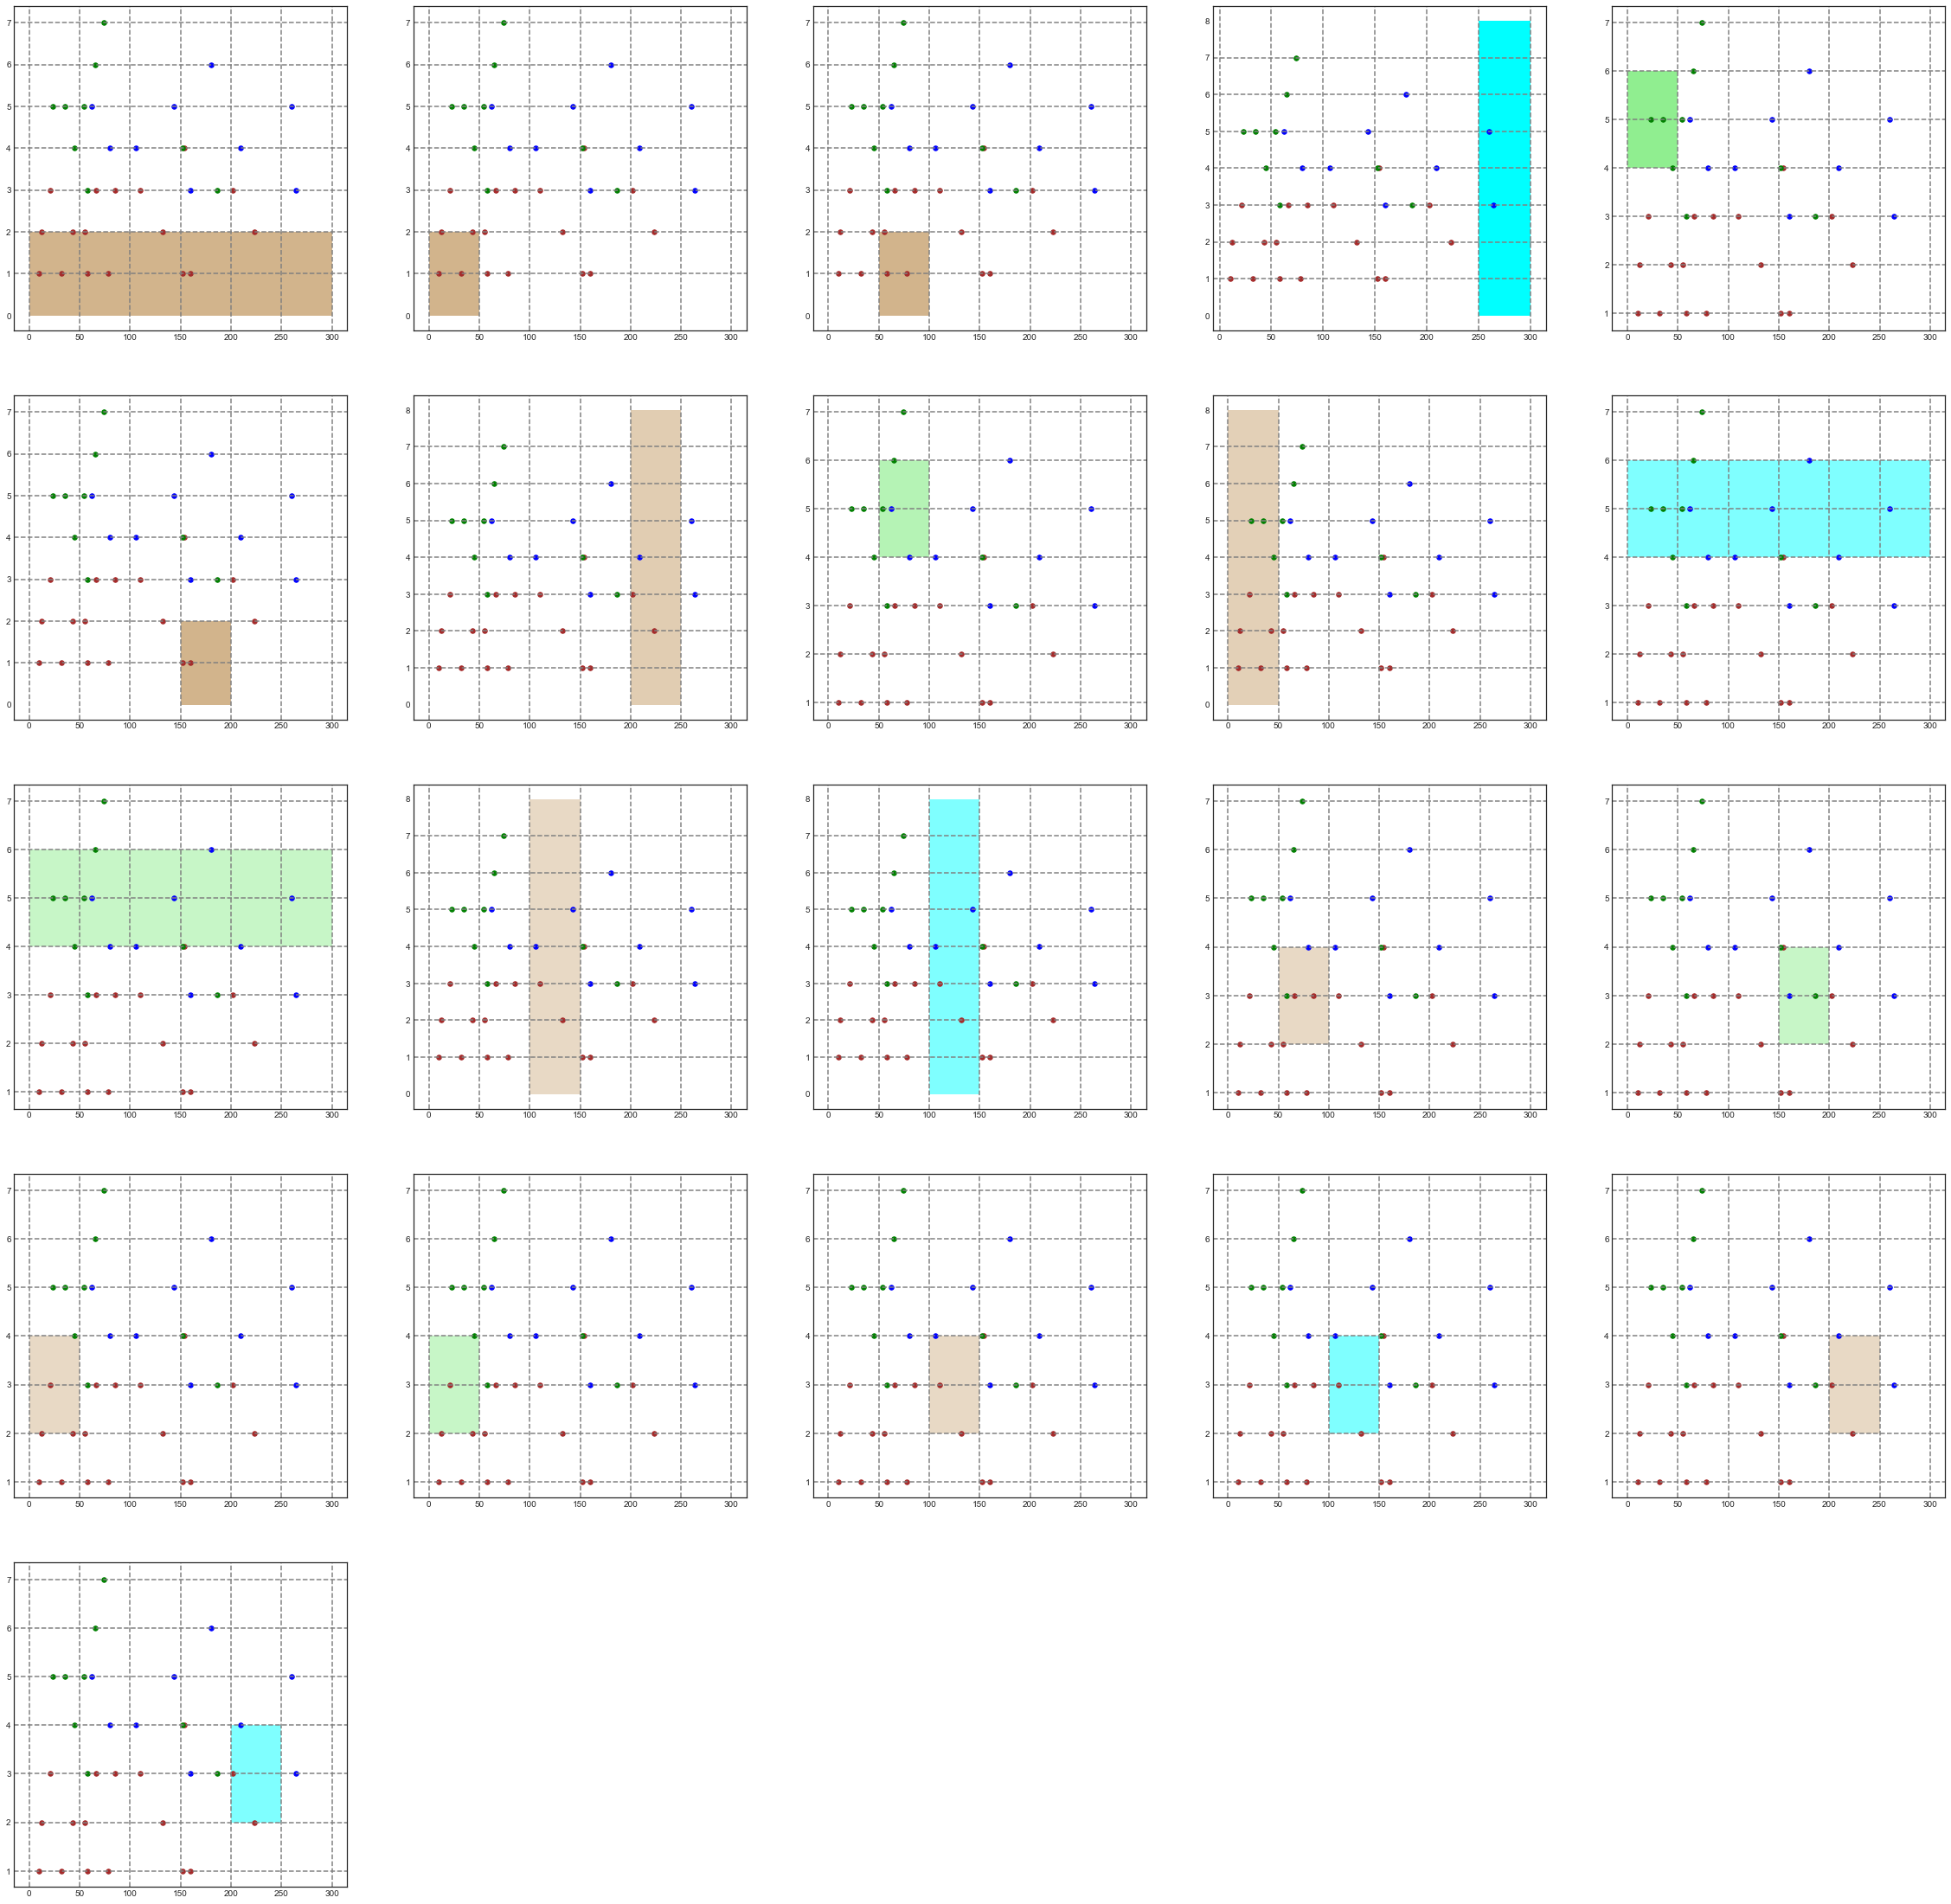

In [26]:
subplot_count = 1
plt.style.use("seaborn-white")

fig, ax = plt.subplots(figsize=(40, 40))

ax.set_xlabel('Estimated Budget (1000$)')
ax.set_ylabel('A-List Celebrities')

for i, r in enumerate(sorted(rules, reverse=True)):
    plt.subplot(5, 5, i + 1)
    plot_rule(r, plt)
    
    # data cases
    for i in range(len(x_points)):
        plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=30)

    # rule boundary lines
    for i, n in enumerate(x):
        plt.axhline(y=y[i], color = "grey", linestyle="dashed")
        plt.axvline(x=x[i], color = "grey", linestyle="dashed")
        
        
plt.savefig("../data/rule_plot.png")


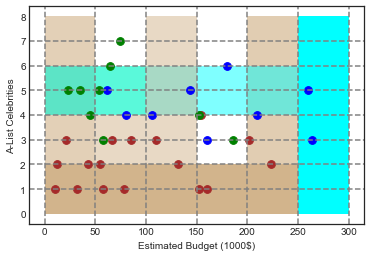

In [27]:
clf = M1Algorithm(rules, transactionDB).build()


for r in clf.rules:
    plot_rule(r, plt)

# data cases
for i in range(len(x_points)):
    plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)


# rule boundary lines
for i, n in enumerate(x):
    plt.axhline(y=y[i], color = "grey", linestyle="dashed")
    plt.axvline(x=x[i], color = "grey", linestyle="dashed")

    
    
plt.xlabel('Estimated Budget (1000$)')
plt.ylabel('A-List Celebrities')

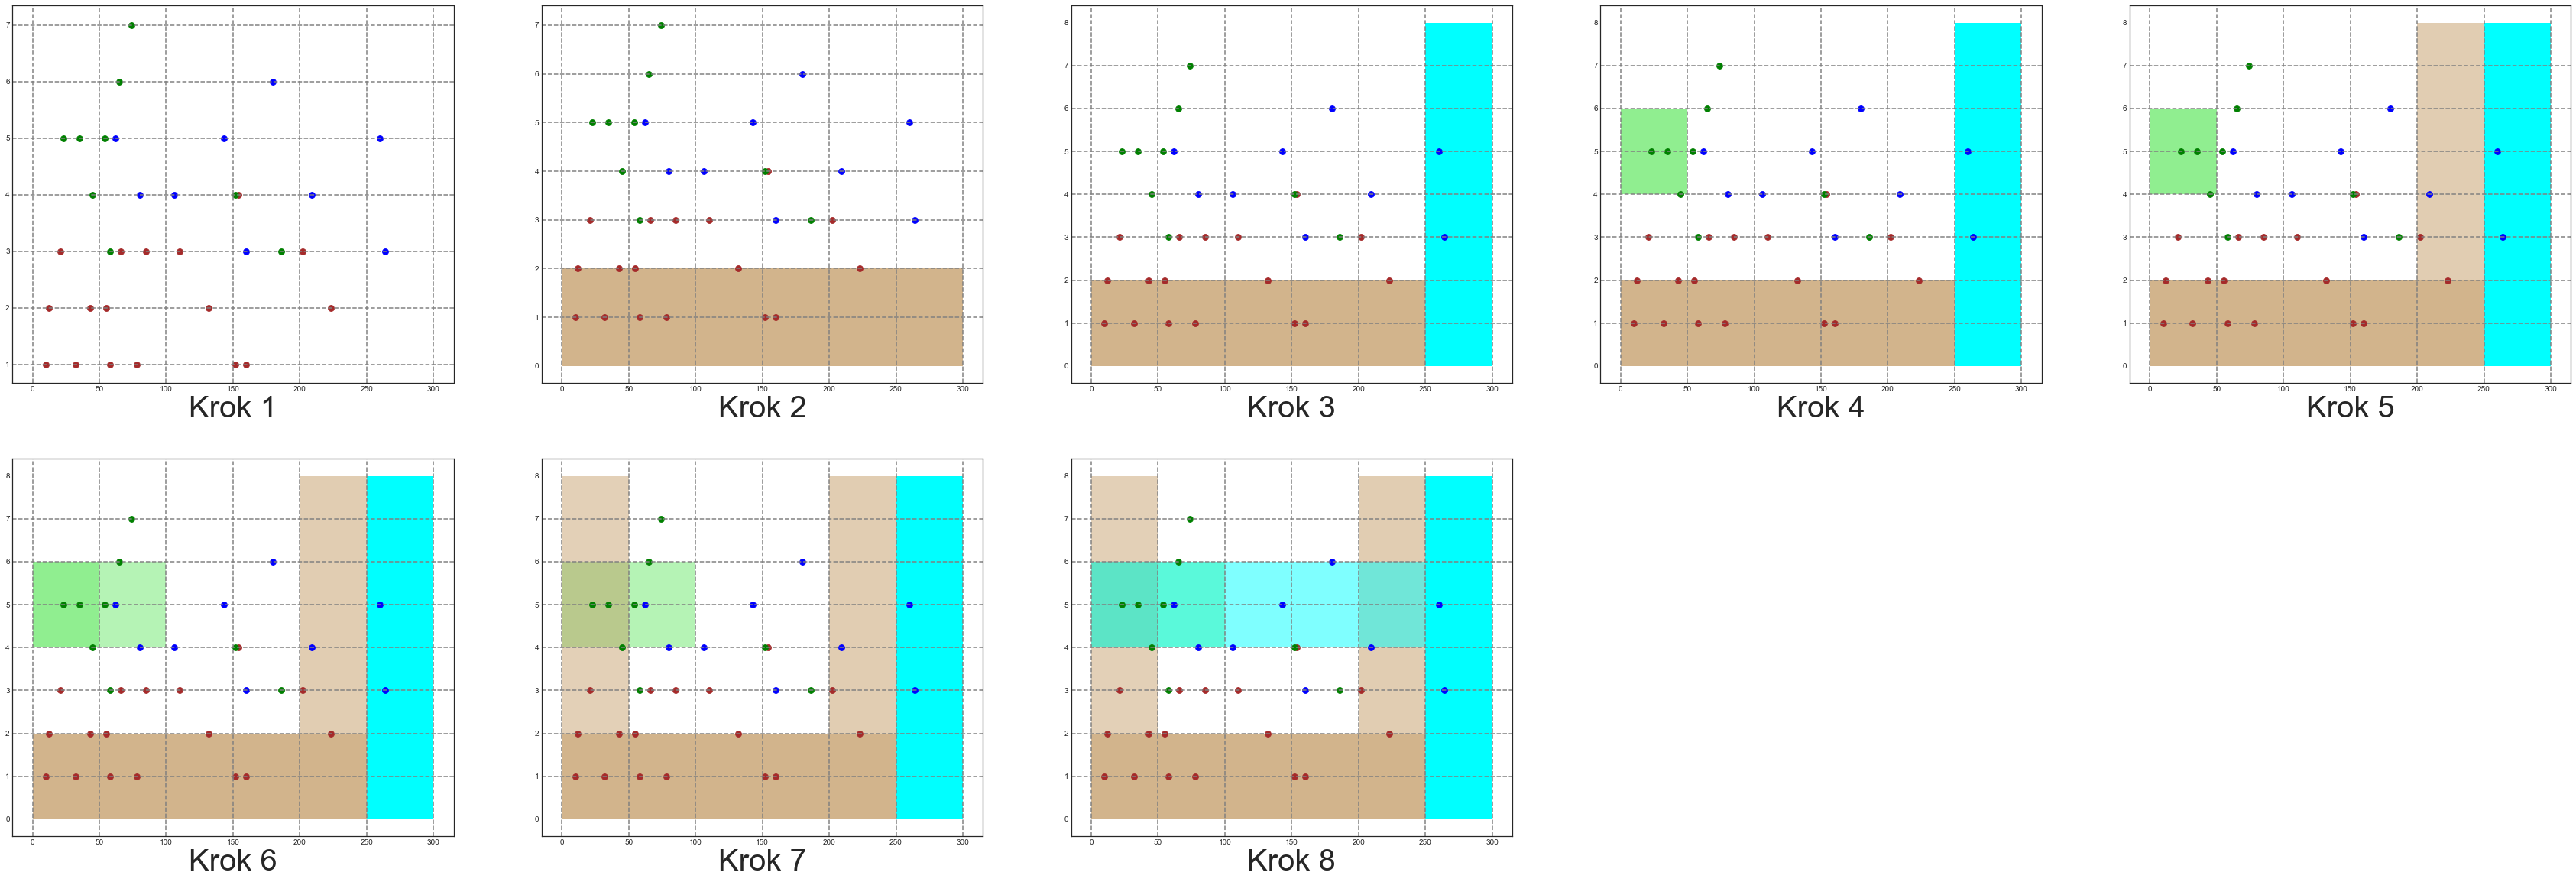

In [28]:
clfm1 = M1Algorithm(rules, transactionDB).build()

fig, ax = plt.subplots(figsize=(60, 20))
for idx, r in enumerate(clfm1.rules):
    plt.subplot(2, 5, idx + 1)
    
    for rule in clfm1.rules[:idx]:
        plot_rule(rule, plt)
    
    for i in range(len(x_points)):
        plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)

    for i, n in enumerate(x):
        plt.axhline(y=y[i], color = "grey", linestyle="dashed")
        plt.axvline(x=x[i], color = "grey", linestyle="dashed")
    
    plt.xlabel("Krok {}".format(idx + 1), fontsize=40)
    
    
    
plt.savefig("../data/m1_rules.png")


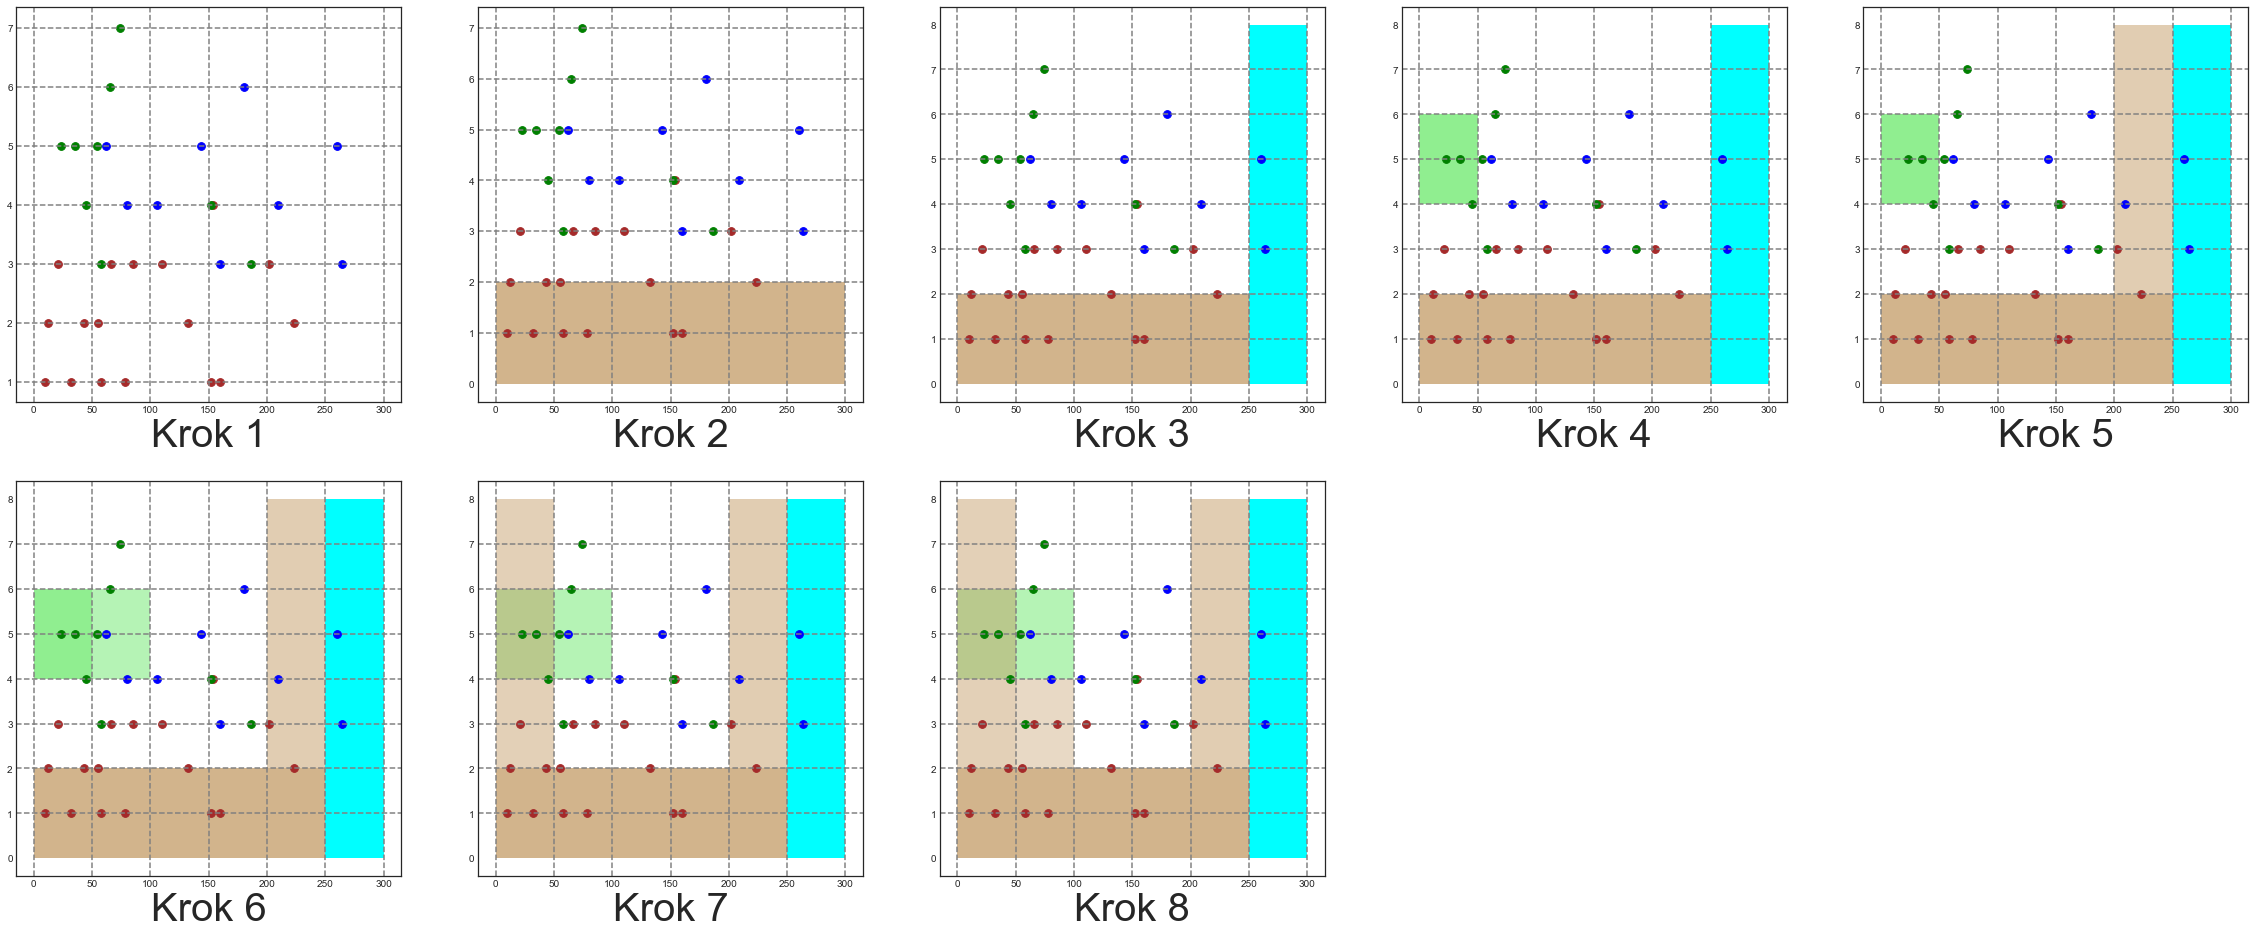

In [29]:
m2 = M2Algorithm(rules, transactionDB)
clfm2 = m2.build()


fig, ax = plt.subplots(figsize=(40, 16))
for idx, r in enumerate(clfm2.rules):
    plt.subplot(2, 5, idx + 1)
    
    for rule in clfm2.rules[:idx]:
        plot_rule(rule, plt)
    
    for i in range(len(x_points)):
        plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)

    for i, n in enumerate(x):
        plt.axhline(y=y[i], color = "grey", linestyle="dashed")
        plt.axvline(x=x[i], color = "grey", linestyle="dashed")
    
    plt.xlabel("Krok {}".format(idx + 1), fontsize=40)
    
    
    
plt.savefig("../data/m2_rules.png")


In [30]:
clfm2.inspect()

,lhs,rhs,confidence,support,length
0,{a-list-celebrities=<0;2)},class=box-office-bomb,1.000000,0.314286,2
1,{estimated-budget=<250;300)},class=main-stream-hit,1.000000,0.057143,2
2,"{estimated-budget=<0;50),a-list-celebrities=<4...",class=critical-success,1.000000,0.057143,3
3,{estimated-budget=<200;250)},class=box-office-bomb,0.666667,0.057143,2
4,"{estimated-budget=<50;100),a-list-celebrities=...",class=critical-success,0.666667,0.057143,3
5,{estimated-budget=<0;50)},class=box-office-bomb,0.625000,0.142857,2
6,"{estimated-budget=<50;100),a-list-celebrities=...",class=box-office-bomb,0.500000,0.057143,3
7,"{a-list-celebrities=<2;4),estimated-budget=<15...",class=critical-success,0.500000,0.057143,3


In [31]:
import sklearn.metrics as skmetrics

m1pred = clfm1.predict_all(transactionDB)
m2pred = clfm2.predict_all(transactionDB)

actual = transactionDB.classes


m1acc = skmetrics.accuracy_score(m1pred, actual)
m2acc = skmetrics.accuracy_score(m2pred, actual)


print("m1 acc", m1acc)
print("m2 acc", m2acc)

m1 acc 0.714285714286
m2 acc 0.742857142857


In [32]:
# plot humidity
humidity_df = pd.read_csv("../data/humtemp.csv")


humidity_df.head()

,Unnamed: 0,Temperature,Humidity,Class
0,1,45,33,2
1,2,27,29,3
2,3,40,48,2
3,4,40,65,1
4,5,38,82,1


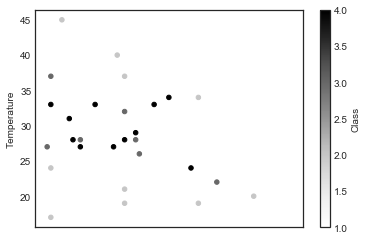

In [33]:
ax = humidity_df.plot.scatter(x="Humidity", y="Temperature", c="Class")
